In [ ]:
import pandas as pd
import numpy as np
import re

In [400]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

In [119]:
from scipy.stats import chi2_contingency

In [ ]:
encuesta1 = pd.read_csv('rencuesta1.csv', delimiter=';' )
variablesE1 = pd.read_csv('variables1.csv' , delimiter=';' )
equivalente_lengua = pd.read_csv('equivalentes_lengua_variablesE1.csv', delimiter=';')

In [ ]:
print(encuesta1.columns)

In [ ]:
encuesta1 = encuesta1.drop(['ID', 'Hora de inicio','Hora de finalización','Correo electrónico','Nombre'], axis=1)

In [ ]:
encuesta1.columns

In [45]:
len(encuesta1.columns)

57

In [46]:
variablesE1

,preguntas,variables
0,En que momento de la charla está llenando la e...,post_charla
1,"Edad [0-17, 18-30,31-40,41-50,51+]",edad
2,Zona Rural o Urbana /Vive fuera o dentro de la...,zona
3,"Genero [Femenino,Masculino, Prefiero no especi...",sex
4,Trabajas Si/No,trabaja
5,Que carrera estudias?,carrera
6,"En que año de la carrera estás? [1er,2do,3er,4...",annio_carrera
7,Te consideras autodidacta Si/No,autodidacta
8,Cientificos,temas_interes_cie
9,Tecnologicos,temas_interes_tec


In [47]:
encuesta1.columns  = variablesE1.loc[ : , 'variables' ]

In [48]:
encuesta1

variables,post_charla,edad,zona,sex,trabaja,carrera,annio_carrera,autodidacta,temas_interes_cie,temas_interes_tec,...,temas_disruptivo_bc,temas_disruptivo_va,temas_disruptivo_nano,segmento_interes_charla,curso_cuantica,charla_informativa,cursos_recomendaciones,charla_util,idea_aplicaciones_charla,calificacion_charla
0,Antes de la Charla,22-27,Zona Urbana,Masculino,Si,Ingeniería en Sistemas,5to año o más,Si,5.0,5.0,...,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla
1,Antes de la Charla,28-32,Zona Urbana,Femenino,Si,Ingeniería en Sistemas,5to año o más,Si,1.0,5.0,...,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla
2,Antes de la Charla,22-27,Zona Urbana,Femenino,Si,Ingeniería en Sistemas,5to año o más,Si,2.0,3.0,...,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla
3,Antes de la Charla,22-27,Zona Urbana,Masculino,No,Ingeniería en Sistemas,5to año o más,Si,5.0,5.0,...,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla
4,Antes de la Charla,17-21,Zona Urbana,Masculino,Si,Ingeniería en Sistemas,4to año,Si,3.0,3.0,...,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Después de la Charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,...,Medio,Medio,Poco,Arquitectura de Computadores;Diseño Digital;Ba...,Si,No,Si,Aplicaciones de la Cuántica;,Si,5.0
80,Después de la Charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,...,Poco,Medio,Medio,Arquitectura de Computadores;Diseño Digital;Co...,Si,Solo si es gratis,Si,Aplicaciones de la Cuántica;,Si,4.0
81,Después de la Charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,...,Poco,Medio,Medio,Arquitectura de Computadores;Diseño Digital;Co...,Si,Solo si es gratis,Si,Fundamentos Computación Cuántica;Aplicaciones ...,Si,4.0
82,Después de la Charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,...,Muy alto,Alto,Muy alto,Compiladores;Arquitectura de Computadores;Sist...,Si,Solo si es gratis,Si,Fundamentos Computación Cuántica;Aplicaciones ...,Si,5.0


**VERIFICANDO COLUMNAS DUPLICADAS**

In [49]:
if len(encuesta1.columns) == len(encuesta1.columns.unique()):
    print("No hay columnas duplicadas en el dataset.")
else:
    dup_columns = encuesta1.columns[encuesta1.columns.duplicated()]
    print(f"Hay columnas duplicadas en el dataset: {dup_columns}")

No hay columnas duplicadas en el dataset.


**ANALISIS DE DATOS NULOS**

In [53]:
datosNulos1 = pd.DataFrame()
for c_ in encuesta1.columns:
    r_ = pd.DataFrame({
        "columna": [c_]
        , "frequencia": np.sum( pd.isnull( encuesta1.loc[ : , c_ ] ) )
        , "porcentaje":  np.sum( pd.isnull( encuesta1.loc[ : , c_] ) ) / encuesta1.shape[0]
    })
    datosNulos1 = pd.concat([ datosNulos1 , r_ ])

In [54]:
datosNulos1.loc[datosNulos1['porcentaje']>0, : ]

,columna,frequencia,porcentaje


In [55]:
columnas_evaluar_e1 =  datosNulos1.loc[ ( datosNulos1['frequencia'] > 0 ) & ( datosNulos1['frequencia'] < 10  ) , "columna" ]
encuesta1_w_nulls = pd.DataFrame()
for c_ in columnas_evaluar_e1:    
    row = encuesta1.loc[ pd.isnull( encuesta1[c_] ) , : ]
    encuesta1_w_nulls = pd.concat( [ encuesta1_w_nulls , row ] )

encuesta1_w_nulls = encuesta1_w_nulls.drop_duplicates()
encuesta1_w_nulls["has_null"] = True

**PARA EVALUAR LA CANTIDAD TOTAL DE REGISTROS DE VALORES NULOS**

In [56]:
encuesta1_w_nulls.shape[0] / encuesta1.shape[0]

0.0

In [57]:
encuesta1_w_nulls

,has_null


In [58]:
encuesta1_wo_nulls = encuesta1.merge( encuesta1_w_nulls.loc[ : , ["has_null"] ] , left_index=True , right_index=True , how="left" )
encuesta1_wo_nulls.loc[ pd.isnull( encuesta1_wo_nulls["has_null"] ) , : ]

,post_charla,edad,zona,sex,trabaja,carrera,annio_carrera,autodidacta,temas_interes_cie,temas_interes_tec,...,temas_disruptivo_va,temas_disruptivo_nano,segmento_interes_charla,curso_cuantica,charla_informativa,cursos_recomendaciones,charla_util,idea_aplicaciones_charla,calificacion_charla,has_null
0,Antes de la Charla,22-27,Zona Urbana,Masculino,Si,Ingeniería en Sistemas,5to año o más,Si,5.0,5.0,...,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,NaN
1,Antes de la Charla,28-32,Zona Urbana,Femenino,Si,Ingeniería en Sistemas,5to año o más,Si,1.0,5.0,...,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,NaN
2,Antes de la Charla,22-27,Zona Urbana,Femenino,Si,Ingeniería en Sistemas,5to año o más,Si,2.0,3.0,...,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,NaN
3,Antes de la Charla,22-27,Zona Urbana,Masculino,No,Ingeniería en Sistemas,5to año o más,Si,5.0,5.0,...,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,NaN
4,Antes de la Charla,17-21,Zona Urbana,Masculino,Si,Ingeniería en Sistemas,4to año,Si,3.0,3.0,...,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Después de la Charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,...,Medio,Poco,Arquitectura de Computadores;Diseño Digital;Ba...,Si,No,Si,Aplicaciones de la Cuántica;,Si,5.0,NaN
80,Después de la Charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,...,Medio,Medio,Arquitectura de Computadores;Diseño Digital;Co...,Si,Solo si es gratis,Si,Aplicaciones de la Cuántica;,Si,4.0,NaN
81,Después de la Charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,...,Medio,Medio,Arquitectura de Computadores;Diseño Digital;Co...,Si,Solo si es gratis,Si,Fundamentos Computación Cuántica;Aplicaciones ...,Si,4.0,NaN
82,Después de la Charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,...,Alto,Muy alto,Compiladores;Arquitectura de Computadores;Sist...,Si,Solo si es gratis,Si,Fundamentos Computación Cuántica;Aplicaciones ...,Si,5.0,NaN


**Tratamiento de variables Nulas** 

columnas con porcentaje de representatibilidad bajo o menor a 5

In [59]:
c_porcentaje_bajo = datosNulos1.loc[ 
    (datosNulos1['porcentaje'] >= 0.001) 
    & (datosNulos1['porcentaje'] < 0.05 )
    , "columna"  
]

In [60]:
c_porcentaje_bajo

Series([], Name: columna, dtype: object)

**CAMBIO DE VARIABLES NaN A VARIBALES NULAS**

Reemplazando valores nulos por respuestas "antes de la charla", "despues de la charla" y "ninguno"

In [61]:
encuesta1[["conexion_tematica", "interes_tema_disruptivo", "participar_investigacion_disruptiva", "temas_disruptivo_bd",
"temas_disruptivo_ia", "temas_disruptivo_cib","temas_disruptivo_bc", "temas_disruptivo_va", "temas_disruptivo_nano",
"segmento_interes_charla", "curso_cuantica", "charla_informativa", "cursos_recomendaciones","charla_util",
"idea_aplicaciones_charla", "calificacion_charla"]] = encuesta1[["conexion_tematica", "interes_tema_disruptivo", "participar_investigacion_disruptiva", "temas_disruptivo_bd",
"temas_disruptivo_ia", "temas_disruptivo_cib","temas_disruptivo_bc", "temas_disruptivo_va", "temas_disruptivo_nano",
"segmento_interes_charla", "curso_cuantica", "charla_informativa", "cursos_recomendaciones","charla_util",
"idea_aplicaciones_charla", "calificacion_charla"]].fillna(value="Despues de charla")

In [62]:
encuesta1[["edad","zona","sex","trabaja","carrera","annio_carrera","autodidacta","temas_interes_cie","temas_interes_tec",
           "temas_interes_mate","temas_interes_lit","tiempo_estudio","internet","gama_pc","habilidad_progra","lengua_progra",
           "conocimento_cat_fc","conocimento_cat_arq","conocimento_cat_pro","conocimento_cat_di","conocimento_cat_mat",
           "avance_cientifico","info_disponible_cientifico","evento_divulg","ambito_charla","nivel_divulg","interes_divulg",
           "presupuesto_divulg","contenido_cientifico","contenido_profesional","responsabilidad_divulg","escu_cuantica",
           "conocimiento_cuantica","info_cuantica","inversion_cuantica","cambio_mundo_cuantica","impacto_industria_cuantica",
           "docentes_incentivo","unah_incentivo"]] = encuesta1[["edad","zona","sex","trabaja","carrera","annio_carrera","autodidacta","temas_interes_cie","temas_interes_tec",
           "temas_interes_mate","temas_interes_lit","tiempo_estudio","internet","gama_pc","habilidad_progra","lengua_progra",
           "conocimento_cat_fc","conocimento_cat_arq","conocimento_cat_pro","conocimento_cat_di","conocimento_cat_mat",
           "avance_cientifico","info_disponible_cientifico","evento_divulg","ambito_charla","nivel_divulg","interes_divulg",
           "presupuesto_divulg","contenido_cientifico","contenido_profesional","responsabilidad_divulg","escu_cuantica",
           "conocimiento_cuantica","info_cuantica","inversion_cuantica","cambio_mundo_cuantica","impacto_industria_cuantica",
           "docentes_incentivo","unah_incentivo"]].fillna(value="Antes de la charla")

In [63]:
encuesta1[["nivel_cuantica"]] = encuesta1[["nivel_cuantica"]].fillna(value="Ninguno")

In [64]:
encuesta1_wo_nulls = encuesta1.merge( encuesta1_w_nulls.loc[ : , ["has_null"] ] , left_index=True , right_index=True , how="left" )
encuesta1_wo_nulls.loc[ pd.isnull( encuesta1_wo_nulls["has_null"] ) , : ]

,post_charla,edad,zona,sex,trabaja,carrera,annio_carrera,autodidacta,temas_interes_cie,temas_interes_tec,...,temas_disruptivo_va,temas_disruptivo_nano,segmento_interes_charla,curso_cuantica,charla_informativa,cursos_recomendaciones,charla_util,idea_aplicaciones_charla,calificacion_charla,has_null
0,Antes de la Charla,22-27,Zona Urbana,Masculino,Si,Ingeniería en Sistemas,5to año o más,Si,5.0,5.0,...,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,NaN
1,Antes de la Charla,28-32,Zona Urbana,Femenino,Si,Ingeniería en Sistemas,5to año o más,Si,1.0,5.0,...,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,NaN
2,Antes de la Charla,22-27,Zona Urbana,Femenino,Si,Ingeniería en Sistemas,5to año o más,Si,2.0,3.0,...,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,NaN
3,Antes de la Charla,22-27,Zona Urbana,Masculino,No,Ingeniería en Sistemas,5to año o más,Si,5.0,5.0,...,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,NaN
4,Antes de la Charla,17-21,Zona Urbana,Masculino,Si,Ingeniería en Sistemas,4to año,Si,3.0,3.0,...,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,Despues de charla,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Después de la Charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,...,Medio,Poco,Arquitectura de Computadores;Diseño Digital;Ba...,Si,No,Si,Aplicaciones de la Cuántica;,Si,5.0,NaN
80,Después de la Charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,...,Medio,Medio,Arquitectura de Computadores;Diseño Digital;Co...,Si,Solo si es gratis,Si,Aplicaciones de la Cuántica;,Si,4.0,NaN
81,Después de la Charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,...,Medio,Medio,Arquitectura de Computadores;Diseño Digital;Co...,Si,Solo si es gratis,Si,Fundamentos Computación Cuántica;Aplicaciones ...,Si,4.0,NaN
82,Después de la Charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,Antes de la charla,...,Alto,Muy alto,Compiladores;Arquitectura de Computadores;Sist...,Si,Solo si es gratis,Si,Fundamentos Computación Cuántica;Aplicaciones ...,Si,5.0,NaN


**VALIDANDO QUE EL DATAFRAME NO TENGA VALORES NULOS**

In [65]:
if encuesta1.isnull().values.any():
    print('El DataFrame tiene valores nulos')
else:
    print('El DataFrame no tiene valores nulos')

El DataFrame no tiene valores nulos


**POPULARIDAD DE VARIABLES CATEGORICAS**

In [66]:
def get_popularidad_seleccion_multiple(df, col, sep=r'[,;]'):
    summary = pd.DataFrame()
    for index, row in df.iterrows():    
        s = pd.DataFrame({
            col: re.split(sep, row[col])
        })
        s[col] = s.apply(lambda r: r[col].strip(), axis=1)
        s['n'] = 1
        summary = pd.concat([summary, s])    
    summary = summary.groupby([col], as_index=False).agg({'n': ['sum']})
    summary.columns = summary.columns.droplevel(1)
    return summary.sort_values('n', ascending=False)

In [67]:
edad_pop = get_popularidad_seleccion_multiple( encuesta1 , "edad" )
annio_carrera_pop = get_popularidad_seleccion_multiple( encuesta1 , "annio_carrera" )
habilidad_progra_pop = get_popularidad_seleccion_multiple( encuesta1 , "habilidad_progra" )
lengua_progra_pop = get_popularidad_seleccion_multiple( encuesta1 , "lengua_progra" )
nivel_divulg_pop = get_popularidad_seleccion_multiple( encuesta1 , "nivel_divulg" )
conexion_tematica_pop = get_popularidad_seleccion_multiple( encuesta1 , "conexion_tematica" )
segmento_interes_charla_pop = get_popularidad_seleccion_multiple( encuesta1 , "segmento_interes_charla" )
charla_util_pop = get_popularidad_seleccion_multiple( encuesta1 , "charla_util" )



In [68]:
#pd.set_option('display.max_rows', None) #linea para visualizar tabla completa

In [69]:
lengua_progra_pop

,lengua_progra,n
0,,48
7,JavaScript,38
1,Antes de la charla,36
3,C++,31
9,PHP,20
10,Python,19
2,C#,5
6,Java,4
4,Go,2
15,java,2


**LIMPIEZA DE: lengua_pogra**

In [70]:
lengua_progra_pop = lengua_progra_pop[lengua_progra_pop['lengua_progra'] != '']

In [71]:
lengua_progra_pop

,lengua_progra,n
7,JavaScript,38
1,Antes de la charla,36
3,C++,31
9,PHP,20
10,Python,19
2,C#,5
6,Java,4
4,Go,2
15,java,2
5,JAVA,1


In [72]:
lengua_progra_pop = lengua_progra_pop.drop(1) #Elimina la fila innecesaria

In [73]:
lengua_progra_pop

,lengua_progra,n
7,JavaScript,38
3,C++,31
9,PHP,20
10,Python,19
2,C#,5
6,Java,4
4,Go,2
15,java,2
5,JAVA,1
8,Julia,1


In [74]:
pd.DataFrame(lengua_progra_pop).to_csv("equivalentes_lengua_variablesE1.csv", sep=";", index=False)

**COMBINACIÓN (INNERJOIN) ENTRE: equivalente_lengua y lengua_progra_pop**

In [75]:
lengua_progra_pop = lengua_progra_pop.merge( equivalente_lengua , right_on="lengua_progra" , left_on="lengua_progra" , how='inner' )

In [76]:
lengua_progra_pop = lengua_progra_pop.loc[ : , ['equivalentes','n_x'] ]

In [77]:
lengua_progra_pop = lengua_progra_pop.groupby( ["equivalentes"] , as_index=False  ).sum()

In [78]:
lengua_progra_pop = lengua_progra_pop.sort_values( ['n_x'] , ascending=False )

**AGREGANDO COLUMNA PORCENTAJE**

In [79]:
lengua_progra_pop['porcentaje'] =  lengua_progra_pop.apply( lambda r: r['n_x'] / np.sum(lengua_progra_pop['n_x']) , axis = 1 )

In [80]:
edad_pop['porcentaje'] =  edad_pop.apply( lambda r: r['n'] / np.sum(edad_pop['n']) , axis = 1 ) 
annio_carrera_pop['porcentaje'] =  annio_carrera_pop.apply( lambda r: r['n'] / np.sum(annio_carrera_pop['n']) , axis = 1 )
habilidad_progra_pop['porcentaje'] =  habilidad_progra_pop.apply( lambda r: r['n'] / np.sum(habilidad_progra_pop['n']) , axis = 1 )
conexion_tematica_pop['porcentaje'] =  conexion_tematica_pop.apply( lambda r: r['n'] / np.sum(conexion_tematica_pop['n']) , axis = 1 )
nivel_divulg_pop['porcentaje'] =  nivel_divulg_pop.apply( lambda r: r['n'] / np.sum(nivel_divulg_pop['n']) , axis = 1 )
segmento_interes_charla_pop['porcentaje'] =  segmento_interes_charla_pop.apply( lambda r: r['n'] / np.sum(segmento_interes_charla_pop['n']) , axis = 1 )
charla_util_pop['porcentaje'] =  charla_util_pop.apply( lambda r: r['n'] / np.sum(charla_util_pop['n']) , axis = 1 )

In [81]:
edad_pop = edad_pop.drop(3) #Elimina la fila vacia
annio_carrera_pop = annio_carrera_pop.drop(4)
habilidad_progra_pop = habilidad_progra_pop.drop(0)
conexion_tematica_pop = conexion_tematica_pop.drop(2) #Elimina la fila vacia
conexion_tematica_pop = conexion_tematica_pop.drop(0)
nivel_divulg_pop = nivel_divulg_pop.drop(1) #Elimina la fila vacia
segmento_interes_charla_pop = segmento_interes_charla_pop.drop(4) #Elimina la fila vacia
segmento_interes_charla_pop = segmento_interes_charla_pop.drop(0) #Elimina la fila vacia
charla_util_pop = charla_util_pop.drop(2) #Elimina la fila vacia

In [82]:
charla_util_pop = charla_util_pop.drop(0) #Elimina la fila vacia

In [83]:
conexion_tematica_pop = conexion_tematica_pop.drop(6)

In [85]:
annio_carrera_pop

,annio_carrera,n,porcentaje
2,4to año,25,0.297619
3,5to año o más,19,0.226190
1,3er año,3,0.035714
0,2do año,1,0.011905


In [86]:
edad_pop

,edad,n,porcentaje
1,22-27,31,0.369048
2,28-32,11,0.130952
0,17-21,5,0.059524
4,Más de 32,1,0.011905


In [87]:
conexion_tematica_pop

,conexion_tematica,n,porcentaje
1,Arquitectura de Computadores,31,0.179191
5,Inteligencia Artificial,30,0.173410
4,Diseño Digital,26,0.150289
3,Diseño,1,0.005780


In [88]:
lengua_progra_pop

,equivalentes,n_x,porcentaje
3,JavaScript,38,0.299213
0,C++,31,0.244094
5,PHP,20,0.157480
6,Python,19,0.149606
4,Otro,10,0.078740
2,Java,7,0.055118
1,Go,2,0.015748


**VISUALIZACIÓN DE POPULARIDAD EN GRAFICO DE BARRAS**

**POPULARIDAD EDAD**

<BarContainer object of 4 artists>

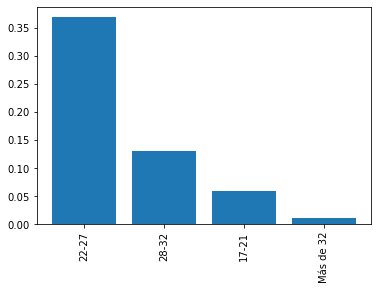

In [89]:
plt.xticks( rotation = 90 )
plt.bar( edad_pop['edad'] , edad_pop['porcentaje'] )

**POPULARIDAD ANNIO CARRERA**

<BarContainer object of 4 artists>

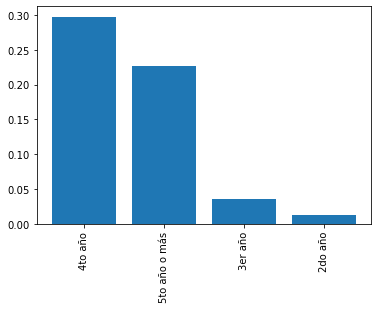

In [90]:
plt.xticks( rotation = 90 )
plt.bar( annio_carrera_pop['annio_carrera'] , annio_carrera_pop['porcentaje'] )

**POPULARIDAD HABILIDAD_PROGRA**

<BarContainer object of 3 artists>

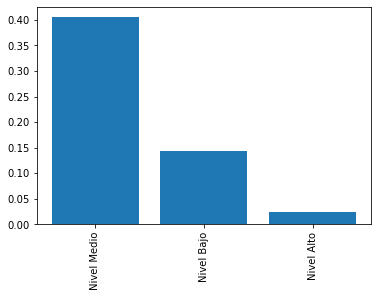

In [91]:
plt.xticks( rotation = 90 )
plt.bar( habilidad_progra_pop['habilidad_progra'] , habilidad_progra_pop['porcentaje'] )

**POPULARIDAD conexion_tematica**

<BarContainer object of 4 artists>

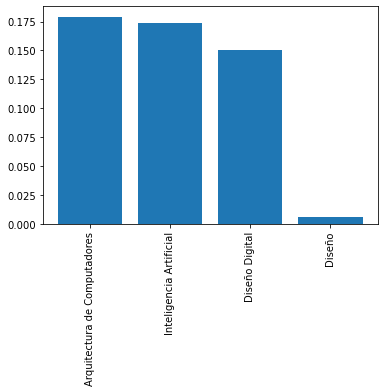

In [92]:
plt.xticks( rotation = 90 )
plt.bar( conexion_tematica_pop['conexion_tematica'] , conexion_tematica_pop['porcentaje'] )

**POPULARIDAD nivel_divulg**

<BarContainer object of 4 artists>

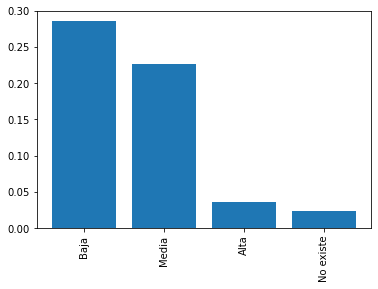

In [93]:
plt.xticks( rotation = 90 )
plt.bar( nivel_divulg_pop['nivel_divulg'] , nivel_divulg_pop['porcentaje'] )

**POPULARIDAD segmento_interes**

<BarContainer object of 5 artists>

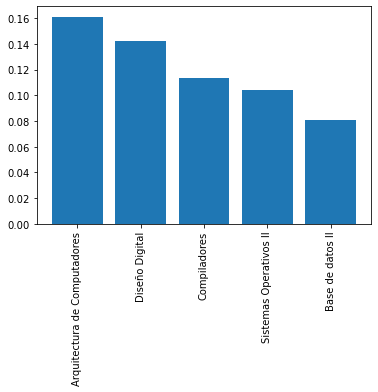

In [94]:
plt.xticks( rotation = 90 )
plt.bar( segmento_interes_charla_pop['segmento_interes_charla'] , segmento_interes_charla_pop['porcentaje'] )

**POPULARIDAD charla_util**

<BarContainer object of 4 artists>

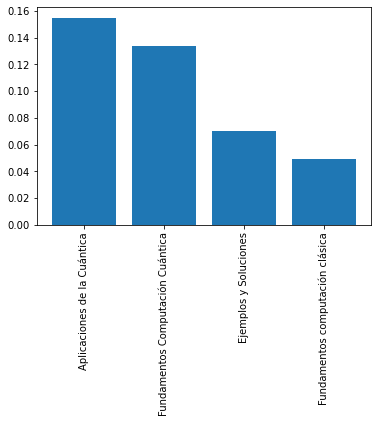

In [95]:
plt.xticks( rotation = 90 )
plt.bar( charla_util_pop['charla_util'] , charla_util_pop['porcentaje'] )

**Analisis de dependencias**


**Hipotesis**

La hipótesis planteada es que los estudiantes tenían un conocimiento limitado antes de recibir la charla y que después de la charla adquirieron un mayor conocimiento sobre el tema.

Ho (nula) = Mide la independencia de dos variables, la de interes_tema_disruptivo y la de participar_investigacion_disruptiva no depende una de la otra.
H1 (alternativa) = las variables de interes_tema_disruptivo y participar_investigacion_disruptiva son dependientes

( Si el p-value es mayor a 0.05: la opcion a seleccionar es la hipotesis nula )

In [ ]:
#Antes y despues de la charla
#conocimiento_cuantica

In [270]:
encuesta1["post_charla"]

0       Antes de la Charla
1       Antes de la Charla
2       Antes de la Charla
3       Antes de la Charla
4       Antes de la Charla
              ...         
79    Después de la Charla
80    Después de la Charla
81    Después de la Charla
82    Después de la Charla
83    Después de la Charla
Name: post_charla, Length: 84, dtype: object

In [356]:
antes_charla_respuesta= []
despues_charla_respuesta = []
count = 0
for i_ in encuesta1["post_charla"]:
    if (i_ == "Antes de la Charla"):
        antes_charla_respuesta.append(encuesta1['conocimiento_cuantica'][count])
    else:
        despues_charla_respuesta.append(encuesta1['conocimiento_cuantica'][count])
    count= count+1

antes_charla_respuestas = pd.DataFrame(antes_charla_respuesta, columns=['antes_charla_cuantica'])
despues_charla_respuestas = pd.DataFrame(despues_charla_respuesta, columns=['despues_charla_cuantica'])

In [357]:
antes_charla_respuestas

,antes_charla_cuantica
0,4
1,2
2,3
3,3
4,2
5,1
6,2
7,2
8,2
9,1


In [358]:
despues_charla_respuestas

,despues_charla_cuantica
0,4
1,2
2,3
3,2
4,2
5,2
6,4
7,4
8,5
9,2


In [360]:
antes_charla_respuestas.value_counts()  / antes_charla_respuestas.shape[0]

antes_charla_cuantica
1                        0.500000
2                        0.270833
3                        0.166667
4                        0.062500
dtype: float64

In [361]:
despues_charla_respuestas.value_counts()  / despues_charla_respuestas.shape[0]

despues_charla_cuantica
3                          0.277778
1                          0.250000
2                          0.250000
4                          0.194444
5                          0.027778
dtype: float64

In [362]:
antes_despues_respuestas = pd.concat([pd.Series(antes_charla_respuesta), pd.Series(despues_charla_respuesta)], axis=1)
antes_despues_respuestas.columns = ['antes_charla_cuantica', 'despues_charla_cuantica']

In [363]:
antes_despues_respuestas

,antes_charla_cuantica,despues_charla_cuantica
0,4,4.0
1,2,2.0
2,3,3.0
3,3,2.0
4,2,2.0
5,1,2.0
6,2,4.0
7,2,4.0
8,2,5.0
9,1,2.0


In [364]:
contigency =  pd.crosstab( antes_despues_respuestas['antes_charla_cuantica'] , antes_despues_respuestas['despues_charla_cuantica'] )

In [365]:
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [369]:
contigency

despues_charla_cuantica,1.0,2.0,3.0,4.0,5.0
antes_charla_cuantica,,,,,
1,4,5,6,2,0
2,4,3,2,2,1
3,1,1,1,1,0
4,0,0,1,2,0


<AxesSubplot:xlabel='despues_charla_cuantica', ylabel='antes_charla_cuantica'>

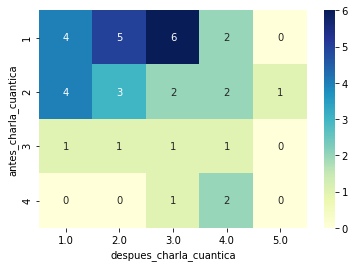

In [366]:
sns.heatmap( contigency , annot = True , cmap="YlGnBu" )

In [367]:
c, p, dof, expected  = chi2_contingency(contigency)

In [368]:
p

0.7053927488508234

**ANALISIS DE RESPUESTAS OBTENIDAS**

Después de recibir la charla sobre computación cuántica, la mayoría de los estudiantes adquirió un mayor conocimiento en comparación con el nivel que tenían antes de la charla.

**ANALISIS DEPENDIENTES**

**Hipotesis**

Los estudiantes que trabajan consideran que las universidades deberían incluir más contenido profesionalizante en su currículo.

Ho (nula) = Mide la independencia de dos variables, la de interes_tema_disruptivo y la de participar_investigacion_disruptiva no depende una de la otra.
H1 (alternativa) = las variables de interes_tema_disruptivo y participar_investigacion_disruptiva son dependientes

( Si el p-value es mayor a 0.05: la opcion a seleccionar es la hipotesis nula )

In [226]:
#trabaja
#contenido_profesional

In [228]:
encuesta1["trabaja"].value_counts()  / encuesta1.shape[0]

Antes de la charla    0.428571
Si                    0.297619
No                    0.273810
Name: trabaja, dtype: float64

In [232]:
trabaja_valores = encuesta1.loc[encuesta1['trabaja'] != 'Antes de la charla', 'trabaja'].astype(str)

In [233]:
trabaja_valores.value_counts()  / trabaja_valores.shape[0]

Si    0.520833
No    0.479167
Name: trabaja, dtype: float64

In [234]:
encuesta1["contenido_profesional"].value_counts()  / encuesta1.shape[0]

Si                    0.559524
Antes de la charla    0.428571
No                    0.011905
Name: contenido_profesional, dtype: float64

In [235]:
contenido_profesional_valores = encuesta1.loc[encuesta1['contenido_profesional'] != 'Antes de la charla', 'contenido_profesional'].astype(str)

In [237]:
contenido_profesional_valores.value_counts() / contenido_profesional_valores.shape[0]

Si    0.979167
No    0.020833
Name: contenido_profesional, dtype: float64

In [304]:
contigency2 = pd.crosstab( contenido_profesional_valores, trabaja_valores )

In [305]:
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='trabaja', ylabel='contenido_profesional'>

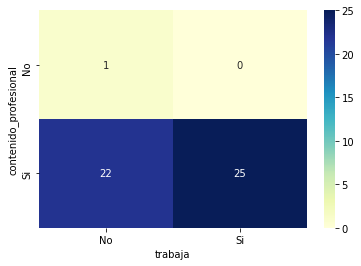

In [307]:
sns.heatmap( contigency2 , annot = True , cmap="YlGnBu" )

In [310]:
c, p, dof, expected  = chi2_contingency(contigency2)

In [311]:
p

0.9663837485754818

**ANALISIS DE RESPUESTAS**

Los estudiantes universitarios y los trabajadores comparten la opinión de que las universidades deberían incorporar más contenido profesionalizante en su currículo. Por lo tanto, el hecho de trabajar no parece influir significativamente en la perspectiva de los estudiantes en cuanto a la necesidad de una formación más orientada al mercado laboral.

**ANALISIS**

Trabajo con contenido científico 

**Hipotesis**

Los estudiantes que no trabajan consideran que las universidades deberían incluir más contenido científico en su currículo.

Ho (nula) = Mide la independencia de dos variables, la de interes_tema_disruptivo y la de participar_investigacion_disruptiva no depende una de la otra.
H1 (alternativa) = las variables de interes_tema_disruptivo y participar_investigacion_disruptiva son dependientes

( Si el p-value es mayor a 0.05: la opcion a seleccionar es la hipotesis nula )

In [252]:
#trabaja
#contenido_cientifico

In [249]:
encuesta1["contenido_cientifico"].value_counts()  / encuesta1.shape[0]

Si                    0.547619
Antes de la charla    0.428571
No                    0.023810
Name: contenido_cientifico, dtype: float64

In [250]:
contenido_cientifico_valores = encuesta1.loc[encuesta1['contenido_cientifico'] != 'Antes de la charla', 'contenido_cientifico'].astype(str)

In [251]:
contenido_cientifico_valores.value_counts() / contenido_cientifico_valores.shape[0]

Si    0.958333
No    0.041667
Name: contenido_cientifico, dtype: float64

In [312]:
contigency3 = pd.crosstab( contenido_cientifico_valores, trabaja_valores )

In [313]:
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='trabaja', ylabel='contenido_cientifico'>

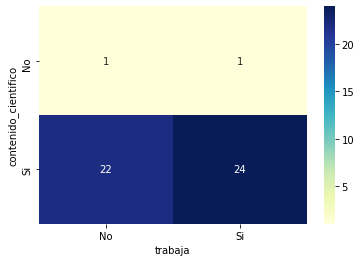

In [314]:
sns.heatmap( contigency3 , annot = True , cmap="YlGnBu" )

In [315]:
c, p, dof, expected  = chi2_contingency(contigency3)

In [316]:
p

0.507524182949593

**ANALISIS DE RESPUESTA**

Tanto los estudiantes que trabajan como aquellos que no lo hacen, coinciden en que la UNAH debería incorporar un enfoque más científico en su plan de estudios, lo que sugiere que el empleo no influye en la percepción de los estudiantes acerca de la importancia de una educación más especializada.

**ANALISIS**

**Hipotesis**

Después de recibir una charla sobre computación cuántica, los estudiantes adquiriran un mayor conocimiento sobre esta tecnología y consideran que existe información necesaria para aprender sobre ella.

Ho (nula) = Mide la independencia de dos variables, la de interes_tema_disruptivo y la de participar_investigacion_disruptiva no depende una de la otra.
H1 (alternativa) = las variables de interes_tema_disruptivo y participar_investigacion_disruptiva son dependientes

( Si el p-value es mayor a 0.05: la opcion a seleccionar es la hipotesis nula )

In [370]:
#Antes y despues de la charla
#info_cuantica

In [371]:
antes_charla_info= []
despues_charla_info = []
count = 0
for i_ in encuesta1["post_charla"]:
    if (i_ == "Antes de la Charla"):
        antes_charla_info.append(encuesta1['info_cuantica'][count])
    else:
        despues_charla_info.append(encuesta1['info_cuantica'][count])
    count= count+1

antes_charla_infoc = pd.DataFrame(antes_charla_info, columns=['antes_charla_info_cuantica'])
despues_charla_infoc = pd.DataFrame(despues_charla_info, columns=['despues_charla_info_cuantica'])

In [372]:
antes_despues_infoc = pd.concat([pd.Series(antes_charla_info), pd.Series(despues_charla_info)], axis=1)
antes_despues_infoc.columns = ['antes_charla_info_cuantica', 'despues_charla_info_cuantica']

In [373]:
antes_despues_infoc

,antes_charla_info_cuantica,despues_charla_info_cuantica
0,Si,Si
1,No se,Si
2,Si,Si
3,Si,Si
4,No,Si
5,No,Si
6,No se,Si
7,No,Si
8,No,Si
9,No se,No se


In [374]:
contigency4 =  pd.crosstab( antes_despues_infoc['antes_charla_info_cuantica'] , antes_despues_infoc['despues_charla_info_cuantica'] )

In [375]:
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='despues_charla_info_cuantica', ylabel='antes_charla_info_cuantica'>

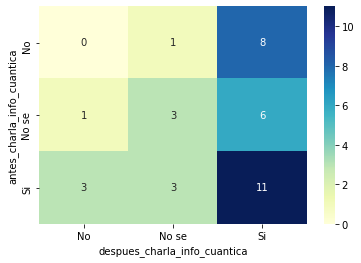

In [376]:
sns.heatmap( contigency4 , annot = True , cmap="YlGnBu" )

In [379]:
contigency4

despues_charla_info_cuantica,No,No se,Si
antes_charla_info_cuantica,,,
No,0,1,8
No se,1,3,6
Si,3,3,11


In [377]:
c, p, dof, expected  = chi2_contingency(contigency4)

In [378]:
p

0.5151659704172553

**ANALISIS DE RESPUESTA**

Después de recibir una charla sobre computación cuántica, la mayoría de los estudiantes encuestados afirman que existe información necesaria para aprender sobre estas tecnologías, tanto antes como después de la charla. Sin embargo, algunos de ellos no sabían de su existencia previamente, pero luego de la charla se percataron de la importancia de estas tecnologias.

**ANALISIS**

**Hipotesis**

La mayoria de estudiantes al conocer mas del tema luego de la charla, consideraran que la computacion cuantica tendra un impacto significativo en la industria y la tecnologia.

Ho (nula) = Mide la independencia de dos variables, la de interes_tema_disruptivo y la de participar_investigacion_disruptiva no depende una de la otra.
H1 (alternativa) = las variables de interes_tema_disruptivo y participar_investigacion_disruptiva son dependientes

( Si el p-value es mayor a 0.05: la opcion a seleccionar es la hipotesis nula )

In [382]:
#Antes y despues de la charla
#impacto_industria_cuantica

In [383]:
antes_charla_industria= []
despues_charla_industria = []
count = 0
for i_ in encuesta1["post_charla"]:
    if (i_ == "Antes de la Charla"):
        antes_charla_industria.append(encuesta1['impacto_industria_cuantica'][count])
    else:
        despues_charla_industria.append(encuesta1['impacto_industria_cuantica'][count])
    count= count+1

antes_charla_industriac = pd.DataFrame(antes_charla_industria, columns=['antes_charla_industria_cuantica'])
despues_charla_industriac = pd.DataFrame(despues_charla_industria, columns=['despues_charla_industria_cuantica'])

In [384]:
antes_despues_industriac = pd.concat([pd.Series(antes_charla_industria), pd.Series(despues_charla_industria)], axis=1)
antes_despues_industriac.columns = ['antes_charla_industria_cuantica', 'despues_charla_industria_cuantica']

In [385]:
antes_despues_industriac

,antes_charla_industria_cuantica,despues_charla_industria_cuantica
0,Si,Si
1,Si,Si
2,Si,Si
3,Si,Si
4,Si,Si
5,Si,Si
6,No se,Si
7,Si,Si
8,Si,Si
9,No se,Si


In [386]:
contigency5 =  pd.crosstab( antes_despues_industriac['antes_charla_industria_cuantica'] , antes_despues_industriac['despues_charla_industria_cuantica'] )

In [387]:
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='despues_charla_industria_cuantica', ylabel='antes_charla_industria_cuantica'>

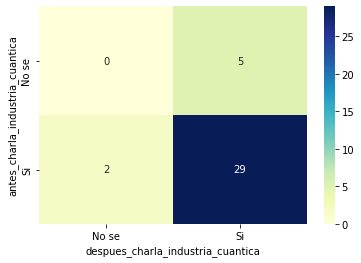

In [388]:
sns.heatmap( contigency5 , annot = True , cmap="YlGnBu" )

In [393]:
contigency5

despues_charla_industria_cuantica,No se,Si
antes_charla_industria_cuantica,,
No se,0,5
Si,2,29


In [391]:
c, p, dof, expected  = chi2_contingency(contigency5)

In [392]:
p

0.6401119179912353

**ANALISIS DE RESPUESTA**


Después de la charla, se puede concluir que la mayoría de los estudiantes mantienen la opinión de que la computación cuántica tendrá un impacto significativo en la industria y la tecnología en el futuro, lo cual sugiere una percepción positiva y consciente sobre el potencial de esta tecnología.